# Lab 4 Part 2: SVM
Jonathan Ting

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from warnings import filterwarnings

# Ignore LinearSVC warnings.
filterwarnings('ignore')

# Read in the Stars.csv dataset.
df = pd.read_csv('Stars.csv')

# Create the y label vector using the Type column.
y = df['Type']
# The features we will be using for prediction are the columns:
# Include: Temperature, L, R, A_M
X = df[['Temperature', 'L', 'R', 'A_M']]

## Question 2.1

Validation accuracy for max_iter=1000000 and C=0.01: 0.92
Validation accuracy for max_iter=1000000 and C=0.1: 0.71
Validation accuracy for max_iter=1000000 and C=1: 0.67
Validation accuracy for max_iter=1000000 and C=10: 0.92
Validation accuracy for max_iter=1000000 and C=100: 0.83
Validation accuracy for max_iter=1000000 and C=1000: 0.96
Validation accuracy for max_iter=100000 and C=0.01: 0.71
Validation accuracy for max_iter=100000 and C=0.1: 0.88
Validation accuracy for max_iter=100000 and C=1: 0.58
Validation accuracy for max_iter=100000 and C=10: 0.71
Validation accuracy for max_iter=100000 and C=100: 0.58
Validation accuracy for max_iter=100000 and C=1000: 0.79
Validation accuracy for max_iter=10000 and C=0.01: 0.67
Validation accuracy for max_iter=10000 and C=0.1: 0.62
Validation accuracy for max_iter=10000 and C=1: 0.50
Validation accuracy for max_iter=10000 and C=10: 0.50
Validation accuracy for max_iter=10000 and C=100: 0.50
Validation accuracy for max_iter=10000 and C=1000: 

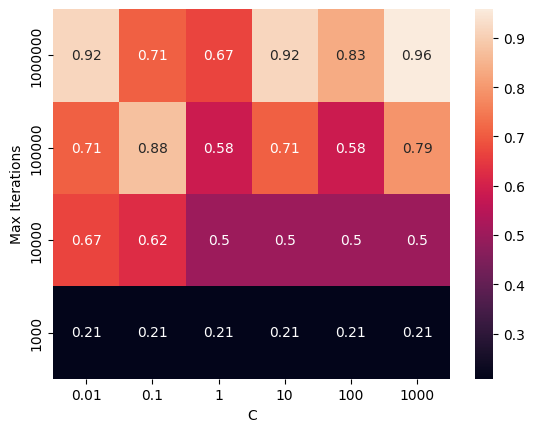

In [20]:
# Create a training and testing set where the testing set is 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a subtraining and validation set from the training set where the validation set is 12.5% of the training data.
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# Evaluate on the validation set for all combinations of maximum iterations and C values.
max_iter = [1000000, 100000, 10000, 1000]
C = [0.01, 0.1, 1, 10, 100, 1000]
df_scores = np.zeros((len(max_iter), len(C)))
for i in max_iter:
    for j in C:
        # Fit the LinearSVC classifier on the training set.
        svc = LinearSVC(random_state=42, max_iter=i, C=j)
        svc.fit(X_subtrain, y_subtrain)

        # Print the validation accuracy for each combination.
        svc_score = svc.score(X_val, y_val)
        print(f'Validation accuracy for max_iter={i} and C={j}: {svc_score:.2f}')
        df_scores[max_iter.index(i)][C.index(j)] = svc_score

# Show a heatmap comparing the validation accuracies across the combinations.
sns.heatmap(df_scores, annot=True)
plt.xlabel('C')
plt.ylabel('Max Iterations')
plt.xticks(np.arange(len(C))+0.5, C)
plt.yticks(np.arange(len(max_iter))+0.5, max_iter)
plt.show()

## Question 2.2

In [21]:
# Create a LinearSVC classifier using the best performaning maximum iterations and C values.
svc = LinearSVC(random_state=42, max_iter=1000000, C=1000)
# Fit on the whole training set.
svc.fit(X_train, y_train)

# Compute and print the training and testing accuracy for the Stars dataset.
svc_score_train = svc.score(X_train, y_train)
svc_score_test = svc.score(X_test, y_test)
print(f'Training accuracy: {svc_score_train:.2f}, Testing accuracy: {svc_score_test:.2f}')

Training accuracy: 0.92, Testing accuracy: 0.83
